# <div style="margin-left :210px">Loan Repayment Project </div>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone who has borrow money will pay back his loan.

## Load and examine


In [1]:
# Import the usual libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read and parse the loan_data.cs file.
data = pd.read_csv('loan_data.csv')
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
# Prints information about a dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Prints the first rows of the dataset 
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# Generate descriptive statistics of the dataset 
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
# How many rows and columns does the dataset have ?
n_rows, n_cols = data.shape
print("The dataset has {} rows and {} columns.".format(
    n_rows, n_cols))

The dataset has 9578 rows and 14 columns.


In [7]:
# List all purposes of this dataset.
print("The different kind of purposes of this dataset are:")
for kind in data.purpose.unique():
    print("  -",kind )

The different kind of purposes of this dataset are:
  - debt_consolidation
  - credit_card
  - all_other
  - home_improvement
  - small_business
  - major_purchase
  - educational


## Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Focus on getting the main idea of the plot and do not hesitate to comment it.

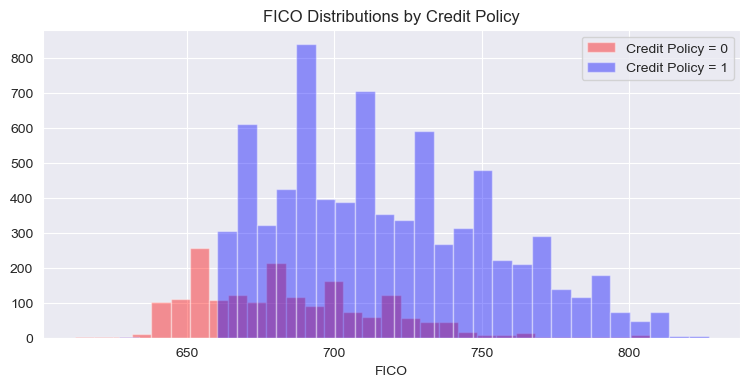

In [8]:
# Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome. 

sns.set_style("darkgrid")
plt.subplots(figsize = (9,4))
sns.distplot(data[data['credit.policy'] == 0]['fico'], bins = 30, kde = False, color = 'red', label = 'Credit Policy = 0')
sns.distplot(data[data['credit.policy'] == 1]['fico'], bins = 30, kde = False, color = 'blue', label = 'Credit Policy = 1')
plt.xlim()
plt.ylim()
plt.title('FICO Distributions by Credit Policy')
plt.legend()
plt.xlabel('FICO')
plt.show()

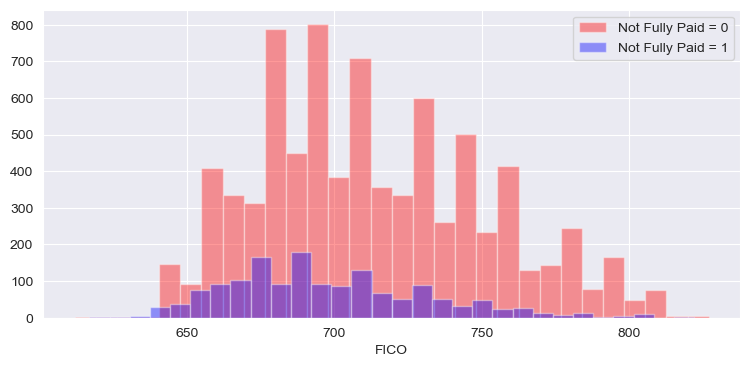

In [9]:
# Create a similar figure, except this time select by the not.fully.paid column.

plt.subplots(figsize = (9,4))
sns.distplot(data[data['not.fully.paid'] == 0]['fico'], bins = 30, kde = False, color = 'red', label = 'Not Fully Paid = 0')
sns.distplot(data[data['not.fully.paid'] == 1]['fico'], bins = 30, kde = False, color = 'blue', label = 'Not Fully Paid = 1')
plt.xlim()
plt.ylim()
plt.legend()
plt.xlabel('FICO')
plt.show()

<Axes: xlabel='purpose', ylabel='count'>

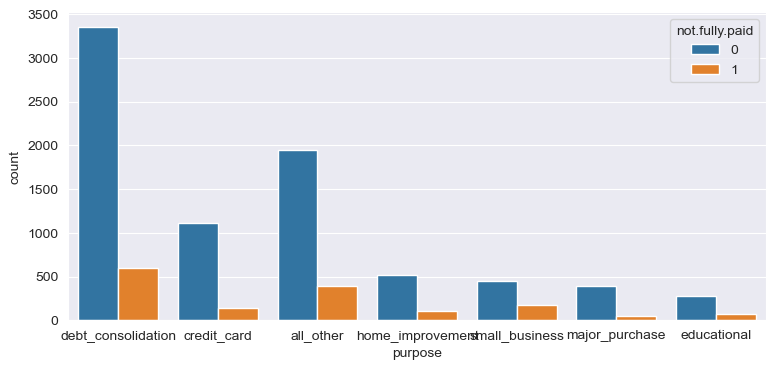

In [10]:
# Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.
plt.subplots(figsize = (9,4))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = data)

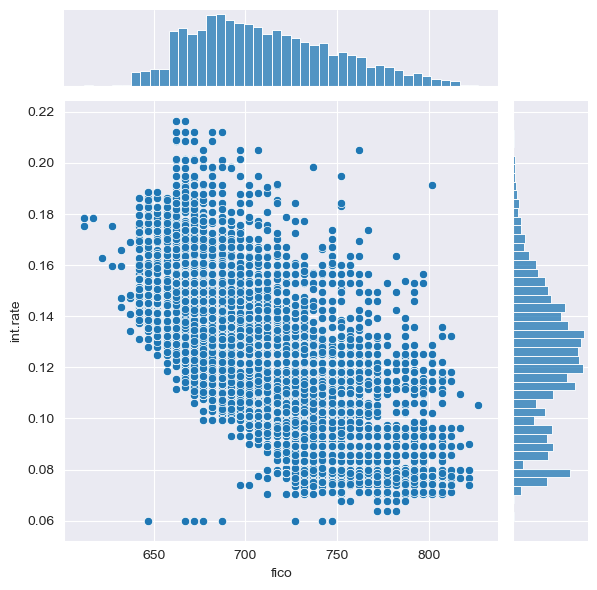

In [11]:
# Let's see the trend between FICO score and interest rate. Use the jointplot function.
sns.jointplot(x = 'fico', y = 'int.rate', data = data)

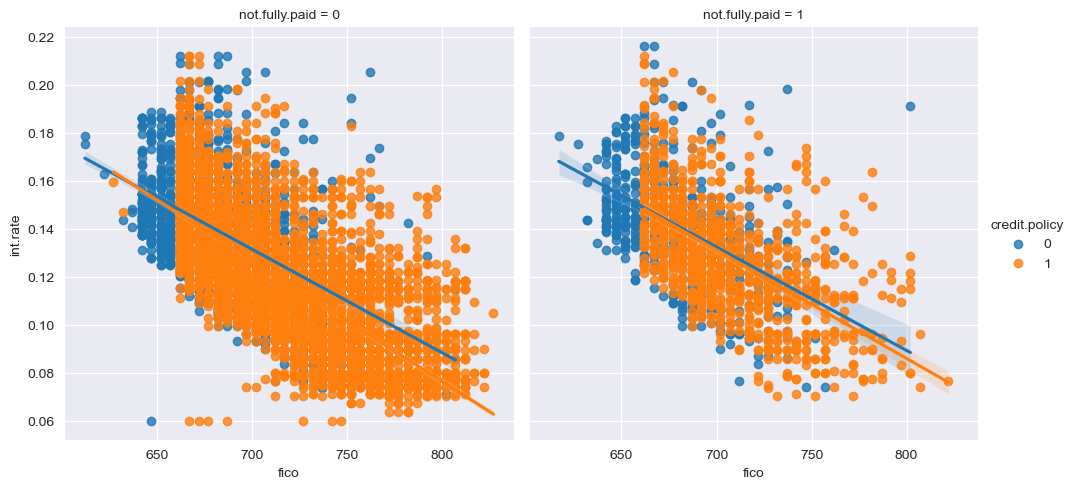

In [12]:
# Create lmplots to see if the trend differed between not.fully.paid and credit.policy.
# Check the documentation for lmplot() if you can't figure out how to separate it into columns.
#?sns.lmplot
sns.lmplot(x = 'fico', y = 'int.rate', col = 'not.fully.paid', hue = 'credit.policy', data = data)

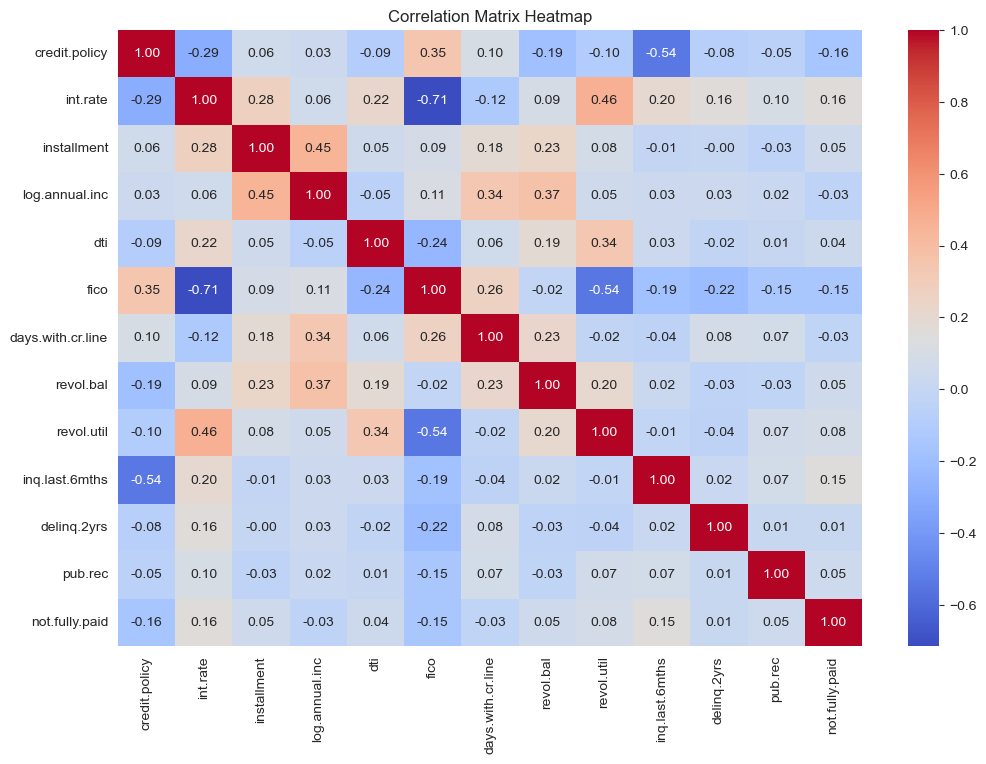

In [15]:
# Is there any other pertinent visualization do plot? explain and describe it
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

La carte de chaleur de la matrice de corrélation montre les liens entre les variables numériques par des couleurs.
Des valeurs proches de 1 ou -1 indiquent une forte corrélation, près de 0 indique une faible corrélation. 

## Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

In [16]:
# Check the information of the dataset with info() again.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

In [17]:
# Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.
cat_feats = ['purpose']

In [18]:
# Now use get_dummies() to create a fixed larger dataframe that has new feature columns with dummy variables.
# Set this dataframe as final_data.
final_data = pd.get_dummies(data, columns = cat_feats, drop_first = True)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,False,False,False,False,False,False
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,False,True,False,False,False,False
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,False,False,False,True,False,False


## Train Test Split

Now its time to split our data into a training set and a testing set!

In [19]:
# Separate your data into a training and a test set
# with 80% for the training set.
from sklearn.model_selection import train_test_split
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state= 70)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

In [20]:
# Import the appropriate version of DecisionTree
from sklearn.tree import DecisionTreeClassifier
# train it with your training data.
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree


In [22]:
# What is the accuracy of your model (both on training
# and test sets) ? 
train_acc = tree.score(X_train, y_train)
test_acc = tree.score(X_test, y_test)
print("Train accuracy: {:.3f}".format(train_acc))
print("Test accuracy: {:.3f}".format(test_acc))

Train accuracy: 1.000
Test accuracy: 0.719


In [23]:
# Create predictions from the test set and create a classification report and a confusion matrix
y_predict = tree.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print('display of classification report')
print(classification_report(y_test, y_predict))
print("display of confusion matrix")
print(confusion_matrix(y_test, y_predict))


display of classification report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1608
           1       0.19      0.23      0.21       308

    accuracy                           0.72      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.72      0.73      1916

display of confusion matrix
[[1307  301]
 [ 238   70]]


In [24]:
# Look at the documentation of your DecisionTree model
# and try to tune the hyperparameters: create other models
# with different values for max_depth, min_samples_split, max_features...
# Train them and evaluate their accuracy. What is the best accuracy you obtain?
import itertools
best_test_acc = 0
best_params = {}
range_max_depth   = range(3,21)
range_min_samples = range(5, 55, 5)
range_features    = range(2, X_train.shape[1])
for depth, samples, feature in itertools.product(
                                range_max_depth,
                                range_min_samples,
                                range_features):
    arbre = DecisionTreeClassifier(max_depth=depth,
                                  min_samples_split=samples,
                                  max_features=feature,
                                  random_state=70)
    arbre.fit(X_train, y_train)
    accuracy = tree.score(X_test, y_test)
    if accuracy > best_test_acc:
        best_test_acc = accuracy
        best_params["depth"] = depth
        best_params["samples"] = samples
        best_params["feature"] = feature
        
print("Best test accuracy: {:.3f}".format(best_test_acc))
print("  - max_depth = ", best_params["depth"])
print("  - min_samples_split = ", best_params["samples"])
print("  - max_features = ", best_params["feature"])

Best test accuracy: 0.719
  - max_depth =  3
  - min_samples_split =  5
  - max_features =  2


In [25]:
# Use the feature_importances_ attribute of your best model. What are
# the three most important features to evaluate the whether or not the borrower paid back their loan in full?
z = pd.DataFrame(tree.feature_importances_,index=X_train.columns,columns=["Importance"])
z.sort_values(by="Importance", ascending=False).head(3)

,Importance
days.with.cr.line,0.138029
installment,0.129853
revol.bal,0.128126


## Training the Random Forest model

Now its time to train our model!


In [26]:
# Import the appropriate version of RandomForest, then
# train it with your training data.
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.


In [29]:
# Predict the class of not.fully.paid for the X_test data
y_predict = forest.predict(X_test)

In [30]:
# What is the accuracy of your model (both on training
# and test sets) ?
train_acc = forest.score(X_train, y_train)
test_acc = forest.score(X_test, y_test)
print("Train accuracy: {:.3f}".format(train_acc))
print("Test accuracy: {:.3f}".format(test_acc))

Train accuracy: 1.000
Test accuracy: 0.837


In [31]:
# Create predictions from the test set and create a classification report. 
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1608
           1       0.35      0.02      0.04       308

    accuracy                           0.84      1916
   macro avg       0.60      0.51      0.47      1916
weighted avg       0.76      0.84      0.77      1916



In [32]:
# Show the Confusion Matrix for the predictions.
print(confusion_matrix(y_test,y_predict))

[[1597   11]
 [ 302    6]]


In [33]:
# Train other random forest model with different
# hyperparameters (n_estimators, max_features). 
best_test_acc = 0
best_params = {}
range_n_estimators = [5, 10, 15, 20, 30, 40, 50, 75, 100]
range_max_depth    = [3, 5, 7, 9, 11, 13, 15]
range_max_features = [4, 8, 12]
for estimator, depth, feature in itertools.product(
                                    range_n_estimators,
                                    range_max_depth,
                                    range_max_features):
    foret = RandomForestClassifier(n_estimators=estimator,
                                    max_depth=depth,
                                    max_features=feature,
                                    random_state=70)
    foret.fit(X_train, y_train)
    accuracy = forest.score(X_test, y_test)
    if accuracy > best_test_acc:
        best_test_acc = accuracy
        best_params["estimator"] = estimator
        best_params["depth"] = depth
        best_params["feature"] = feature
        
print("Best test accuracy: {:.3f}".format(best_test_acc))
print("  - n_estimators = ", best_params["estimator"])
print("  - max_depth = ", best_params["depth"])
print("  - max_features = ", best_params["feature"])

Best test accuracy: 0.837
  - n_estimators =  5
  - max_depth =  3
  - max_features =  4
